# Where do NBA players come from: a visualization

## Importing the necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Reading the data
### Reading states and selecting the U.S.A.

In [3]:
states = gpd.read_file("GeoData/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
usa_states = states[states["admin"] == "United States of America"]
usa_states = usa_states.rename(columns={"name":"state"})

### Reading countries and selecting Europe

In [4]:
countries = gpd.read_file("GeoData/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
europe = countries[countries["CONTINENT"] == "Europe"]
europe = europe.rename(columns={"NAME":"country"})

### Reading NBA player count, population, and urban population as a percentage of the total population

In [5]:
players_usa_states = pd.read_csv("GeoData/players_usa_states.csv")
players_europe = pd.read_csv("GeoData/players_europe.csv")

## Preparing the data
### Keeping only useful columns

In [6]:
usa_states = usa_states[["state", "geometry"]]
europe = europe[["country", "geometry"]]
europe.at[223, "country"] = "Aland" 

### Changing the crs

In [7]:
usa_states = usa_states.to_crs(epsg=3395)
europe = europe.to_crs(epsg=3395)

### Sorting by name

In [8]:
usa_states.sort_values("state", inplace=True)
europe.sort_values("country", inplace=True)

### Checking the shape of the dataframes

In [9]:
print(f"Shape of USA states df:{usa_states.shape}\nShape of the Europe df:{europe.shape}\nShape of the player count for the USA states df:{players_usa_states.shape}\nShape of the player count for the europe df:{players_europe.shape}")

Shape of USA states df:(51, 2)
Shape of the Europe df:(51, 2)
Shape of the player count for the USA states df:(51, 4)
Shape of the player count for the europe df:(51, 3)


**NOTE**: it is pure coincidence that the number of US states is equal to the number of European countries (51). The only data frames that should match in terms of rows are ``usa_states`` with ``players_usa_states``, and ``europe`` with ``players_europe`` 

### Merging the data

In [10]:
usa_states = pd.merge(usa_states, players_usa_states, on="state")
europe = pd.merge(europe, players_europe, on="country")

In [11]:
usa_states.head(3)

,state,geometry,player_count,pop,urban%
0,Alabama,(POLYGON ((-9731508.266528985 3543680.39474100...,83,4887871,59.0
1,Alaska,(POLYGON ((-15696667.57581729 10915934.7693105...,1,737438,66.0
2,Arizona,POLYGON ((-12357161.30409626 3653100.611940312...,15,7171646,89.8


### Creating new columns

In [12]:
usa_states["per_10k"] = (usa_states["player_count"] / usa_states["pop"]) * 10000
usa_states["urban_pop"] = usa_states["pop"] * (usa_states["urban%"] / 100)
usa_states["per_10k_urban"] = (usa_states["player_count"] / usa_states["urban_pop"]) * 10000

In [13]:
europe["per_100k"] = (europe["player_count"] / europe["pop"]) * 100000

In [14]:
usa_states.head(3)

,state,geometry,player_count,pop,urban%,per_10k,urban_pop,per_10k_urban
0,Alabama,(POLYGON ((-9731508.266528985 3543680.39474100...,83,4887871,59.0,0.169808,2883843.890,0.287810
1,Alaska,(POLYGON ((-15696667.57581729 10915934.7693105...,1,737438,66.0,0.013560,486709.080,0.020546
2,Arizona,POLYGON ((-12357161.30409626 3653100.611940312...,15,7171646,89.8,0.020916,6440138.108,0.023291


In [15]:
europe.head(3)

,country,geometry,player_count,pop,per_100k
0,Aland,(POLYGON ((2257291.939975735 8394363.415716402...,0,29489,0.0
1,Albania,"POLYGON ((2289524.359830843 5113473.158578711,...",0,2938428,0.0
2,Andorra,"POLYGON ((190023.0910212309 5207716.664570724,...",0,77072,0.0


## Visualizing the data
### Population by state

In [16]:
#fig, ax = plt.subplots(figsize=(10,5)) # (20,10) final ax = usa_states.plot()
#usa_states.plot(ax=ax, column="pop", cmap="YlGn", edgecolor="k", legend=True)
#ax.set_title("Total population per state")
#ax.set_axis_off()
#ax.set(xlim=(-1.4*10**7, -0.74*10**7), ylim=(0.2750*10**7, 0.65*10**7))

### NBA players generated by each state

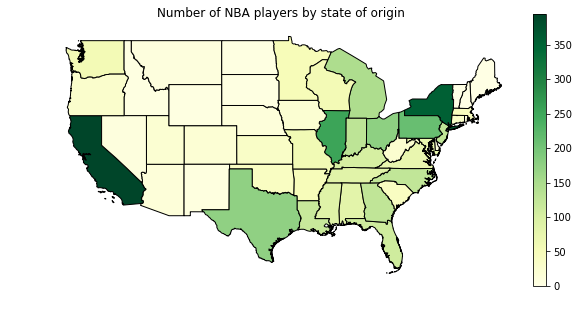

In [17]:
fig, ax = plt.subplots(figsize=(10,5)) # (20,10) final ax = usa_states.plot()
usa_states.plot(ax=ax, column="player_count", cmap="YlGn", edgecolor="k", legend=True)
ax.set_title("Number of NBA players by state of origin")
ax.set_axis_off()
ax.set(xlim=(-1.4*10**7, -0.74*10**7), ylim=(0.2750*10**7, 0.65*10**7))
#fig.savefig('nba_by_state_origin.png', bbox_inches="tight", pad_inches=0.5)

### NBA players generated by each state per 10,000 population

In [355]:
usa_states.sort_values("per_10k", ascending=False).head(3)

,state,geometry,player_count,pop,urban%,per_10k,urban_pop,per_10k_urban
8,District of Columbia,"POLYGON ((-8574153.667738497 4666679.34814022,...",72,702455,100.0,1.024977,702455.000,1.024977
24,Mississippi,(POLYGON ((-9840993.30177241 3531859.303172599...,88,2986530,49.3,0.294656,1472359.290,0.597680
18,Louisiana,(POLYGON ((-9965987.660083991 3506868.25931692...,118,4659978,73.2,0.253220,3411103.896,0.345929


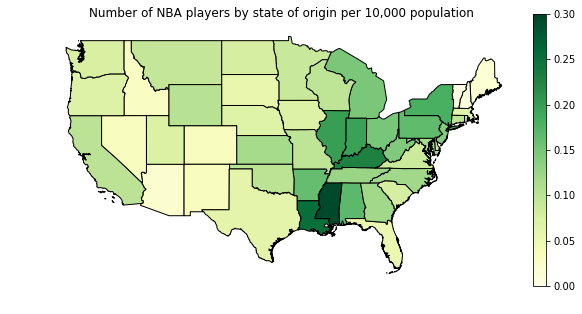

In [18]:
fig, ax = plt.subplots(figsize=(10,5)) # (20,10) final ax = usa_states.plot()
usa_states.plot(ax=ax, column="per_10k", cmap="YlGn", edgecolor="k", legend=True, vmax=0.3)
ax.set_title("Number of NBA players by state of origin per 10,000 population")
ax.set_axis_off()
ax.set(xlim=(-1.4*10**7, -0.74*10**7), ylim=(0.2750*10**7, 0.65*10**7))
#fig.savefig('nba_by_state_10k.png', bbox_inches="tight", pad_inches=0.5)

### NBA players generated by each state per 10,000 population in urban areas

In [357]:
usa_states.sort_values("per_10k_urban", ascending=False).head(3)

,state,geometry,player_count,pop,urban%,per_10k,urban_pop,per_10k_urban
8,District of Columbia,"POLYGON ((-8574153.667738497 4666679.34814022,...",72,702455,100.0,1.024977,702455.000,1.024977
24,Mississippi,(POLYGON ((-9840993.30177241 3531859.303172599...,88,2986530,49.3,0.294656,1472359.290,0.597680
17,Kentucky,(POLYGON ((-9935633.494172597 4353757.57122196...,103,4468402,58.4,0.230507,2609546.768,0.394705


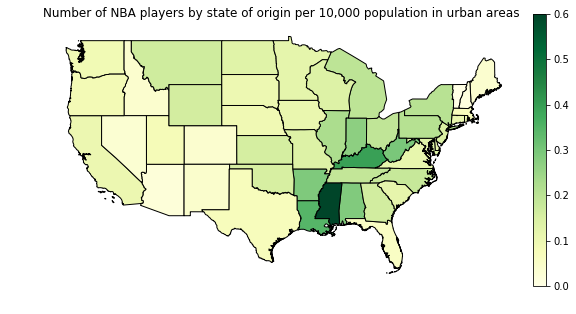

In [19]:
fig, ax = plt.subplots(figsize=(10,5)) # (20,10) final ax = usa_states.plot()
usa_states.plot(ax=ax, column="per_10k_urban", cmap="YlGn", edgecolor="k", legend=True, vmax=0.6)
ax.set_title("Number of NBA players by state of origin per 10,000 population in urban areas")
ax.set_axis_off()
ax.set(xlim=(-1.4*10**7, -0.74*10**7), ylim=(0.2750*10**7, 0.65*10**7))
#fig.savefig('nba_by_state_10k_urban.png', bbox_inches="tight", pad_inches=0.5)

### Population by European country
### NBA players generated by each european country

In [20]:
europe.sort_values("player_count", ascending=False).head(3)

,country,geometry,player_count,pop,per_100k
15,Germany,(POLYGON ((1537959.441994965 6203171.511031982...,25,82438639,0.030326
14,France,(POLYGON ((-6023667.597956657 233837.708230954...,22,65480710,0.033598
42,Serbia,"POLYGON ((2253421.079085943 5766882.081550621,...",21,8733407,0.240456


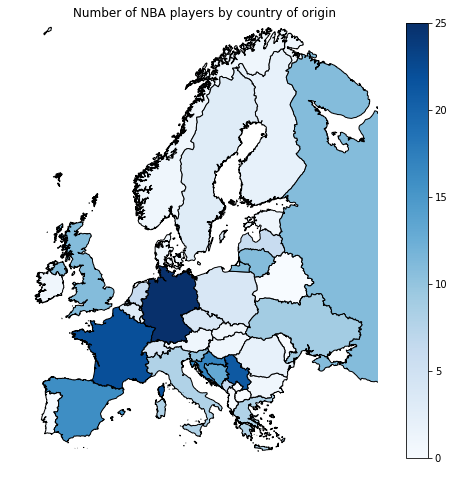

In [21]:
fig, ax = plt.subplots(figsize=(10,8)) # (20,10) final ax = usa_states.plot()
europe.plot(ax=ax, column="player_count", cmap="Blues", edgecolor="k", legend=True)
ax.set_title("Number of NBA players by country of origin")
ax.set_axis_off()
ax.set(xlim=(-0.125*10**7, 0.475*10**7), ylim=(0.4*10**7, 1.150*10**7))
#fig.savefig('nba_by_country_europe.png', bbox_inches="tight", pad_inches=0.5)

### NBA players generated by each European country per 100,000 population

In [22]:
europe.sort_values("per_100k", ascending=False).head(3)

,country,geometry,player_count,pop,per_100k
34,Montenegro,"POLYGON ((2059013.156180375 5194719.280683878,...",6,629355,0.953357
44,Slovenia,"POLYGON ((1512779.43081195 5668327.054829944, ...",10,2081900,0.480330
8,Croatia,(POLYGON ((1838474.959288648 5830107.335209935...,17,4140148,0.410613


[(4000000.0, 11500000.0), (-1250000.0, 4750000.0)]

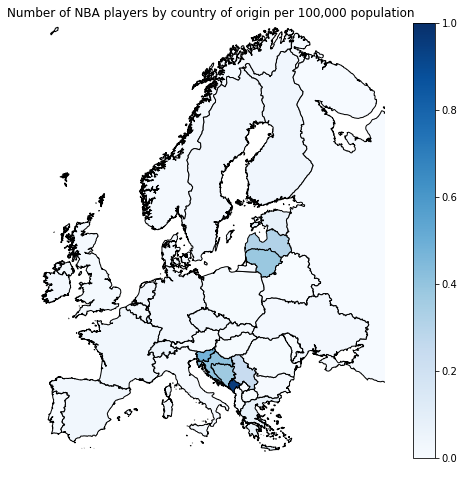

In [23]:
fig, ax = plt.subplots(figsize=(10,8)) # (20,10) final ax = usa_states.plot()
europe.plot(ax=ax, column="per_100k", cmap="Blues", edgecolor="k", legend=True, vmax=1.0)
ax.set_title("Number of NBA players by country of origin per 100,000 population")
ax.set_axis_off()
ax.set(xlim=(-0.125*10**7, 0.475*10**7), ylim=(0.4*10**7, 1.150*10**7))